<a href="https://colab.research.google.com/github/MuraliMohan0415/BDA-Mini-Project/blob/main/Carbon_Emissions_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌍 Carbon Emissions by Products: A PySpark Analytics Project

This project analyzes CO2 emissions of different products using **PySpark**.
We will load the dataset, clean it, perform analytics, and visualize results.

In [ ]:
# Install PySpark (only needed in Google Colab)
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder.appName("CarbonEmissionsProject").getOrCreate()

# Load dataset (upload your file or provide Google Drive path)
df = spark.read.csv("Carbon_Emissions_By_Products.csv", header=True, inferSchema=True)

# Show first 5 records
df.show(5)

+---+-----------------+-----------+-----+----------------------+--------------+------------+-------------+
| ID|          Product|   Category| Unit|Carbon_Emission_kgCO2e|Energy_Used_MJ|Water_Used_L|       Region|
+---+-----------------+-----------+-----+----------------------+--------------+------------+-------------+
|  1|   Packaged Chips|       Food|   km|                  7.06|         39.65|       67.59|North America|
|  2|     Electric Fan|Electronics| pack|                 12.03|         48.36|       90.68|North America|
|  3|      Steel Straw|   Reusable|   km|                 66.09|         21.98|      197.56|    Australia|
|  4|Flight (Domestic)|  Transport|   kg|                  9.16|         25.61|       33.53|North America|
|  5|        Bike Ride|  Transport|liter|                 79.64|         24.33|       77.32|         Asia|
+---+-----------------+-----------+-----+----------------------+--------------+------------+-------------+
only showing top 5 rows



## 🔍 Step 1: Explore Dataset

In [ ]:
# Print schema
df.printSchema()

# Count rows
print("Total records:", df.count())

# Summary statistics
df.describe().show()

# Unique product categories
df.select("Category").distinct().show()

root
 |-- ID: integer (nullable = true)
 |-- Product: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Unit: string (nullable = true)
 |-- Carbon_Emission_kgCO2e: double (nullable = true)
 |-- Energy_Used_MJ: double (nullable = true)
 |-- Water_Used_L: double (nullable = true)
 |-- Region: string (nullable = true)

Total records: 550
+-------+-----------------+-------------------+---------+-----+----------------------+------------------+------------------+-------------+
|summary|               ID|            Product| Category| Unit|Carbon_Emission_kgCO2e|    Energy_Used_MJ|      Water_Used_L|       Region|
+-------+-----------------+-------------------+---------+-----+----------------------+------------------+------------------+-------------+
|  count|              550|                550|      550|  550|                   550|               550|               550|          550|
|   mean|            275.5|               NULL|     NULL| NULL|     49.16627272727275| 

## 🧹 Step 2: Data Cleaning

In [ ]:
# Drop duplicates
df = df.dropDuplicates()

# Fill missing values with 0
df = df.na.fill(0)

print("Cleaned dataset record count:", df.count())

Cleaned dataset record count: 550


## 📊 Step 3: Analytics Queries

In [ ]:
# 1. Average CO2 Emissions by Category
df.groupBy("Category").avg("Carbon_Emission_kgCO2e").show()

# 2. Top 10 Products by Carbon Emission
df.orderBy(df["Carbon_Emission_kgCO2e"].desc()).select("Product", "Carbon_Emission_kgCO2e").show(10)

# 3. Region-Wise Carbon Emissions
df.groupBy("Region").sum("Carbon_Emission_kgCO2e").show()

# 4. Water vs Carbon Emissions Correlation
print("Correlation between Water Usage and Carbon Emission:", df.stat.corr("Water_Used_L", "Carbon_Emission_kgCO2e"))

+-----------+---------------------------+
|   Category|avg(Carbon_Emission_kgCO2e)|
+-----------+---------------------------+
|       Food|          46.38520325203252|
|Electronics|          51.20614583333333|
|   Clothing|          51.01157894736841|
|  Packaging|          51.71691358024693|
|   Reusable|          49.55771428571428|
|  Transport|         46.973942307692305|
+-----------+---------------------------+

+-----------------+----------------------+
|          Product|Carbon_Emission_kgCO2e|
+-----------------+----------------------+
| T-shirt (Cotton)|                 99.91|
|        Paper Cup|                 99.85|
|       Smartphone|                 99.79|
|        Bike Ride|                 99.74|
|Packaged Biscuits|                 99.55|
|       Cotton Bag|                 99.01|
|   Plastic Bottle|                 98.75|
|         LED Bulb|                 98.58|
|     Aluminum Can|                 98.21|
|            Jeans|                 98.16|
+-----------------+-

## 📈 Step 4: Visualization (Matplotlib)

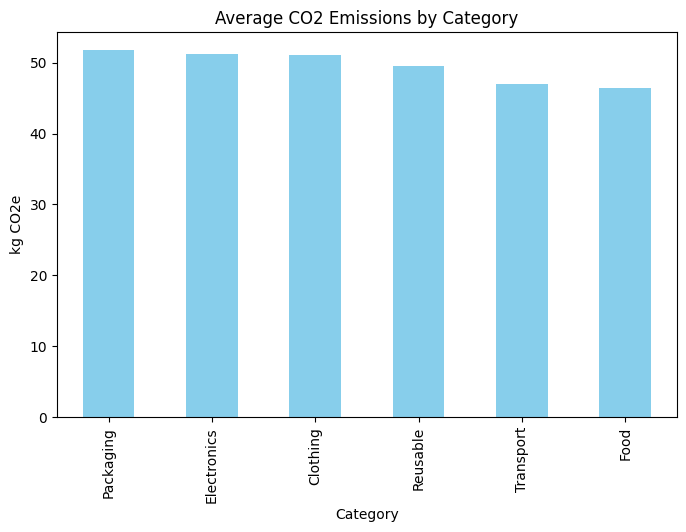

In [ ]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame → Pandas
pdf = df.toPandas()

# Group by category
category_emissions = pdf.groupby("Category")["Carbon_Emission_kgCO2e"].mean().sort_values(ascending=False)

# Plot
category_emissions.plot(kind="bar", figsize=(8,5), color="skyblue")
plt.title("Average CO2 Emissions by Category")
plt.ylabel("kg CO2e")
plt.show()

/tmp/ipython-input-2018704745.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_emissions.values, y=category_emissions.index, palette="viridis")


<Figure size 1000x600 with 0 Axes>

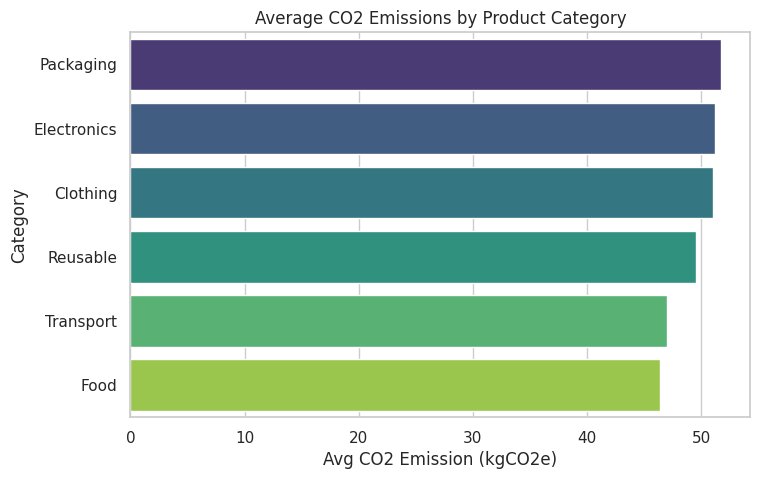

/tmp/ipython-input-2018704745.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="rocket")


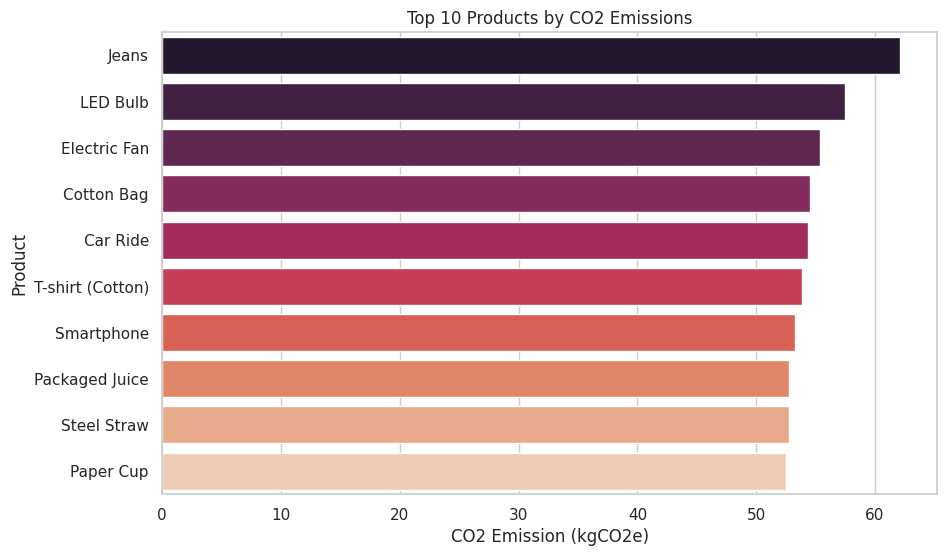

/tmp/ipython-input-2018704745.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_emissions.index, y=region_emissions.values, palette="coolwarm")


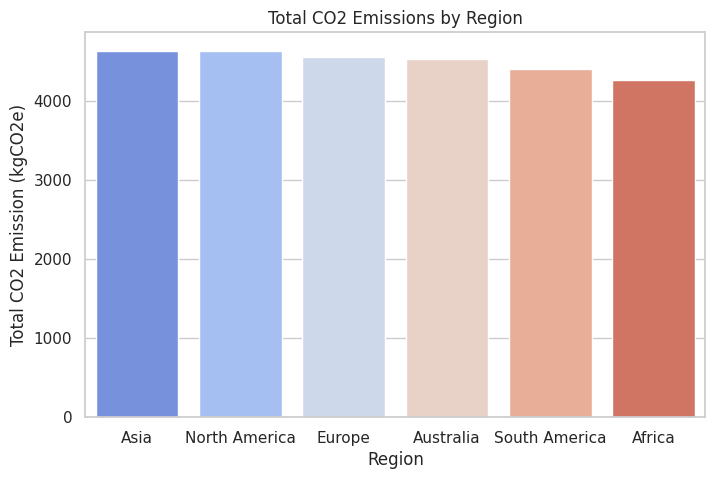

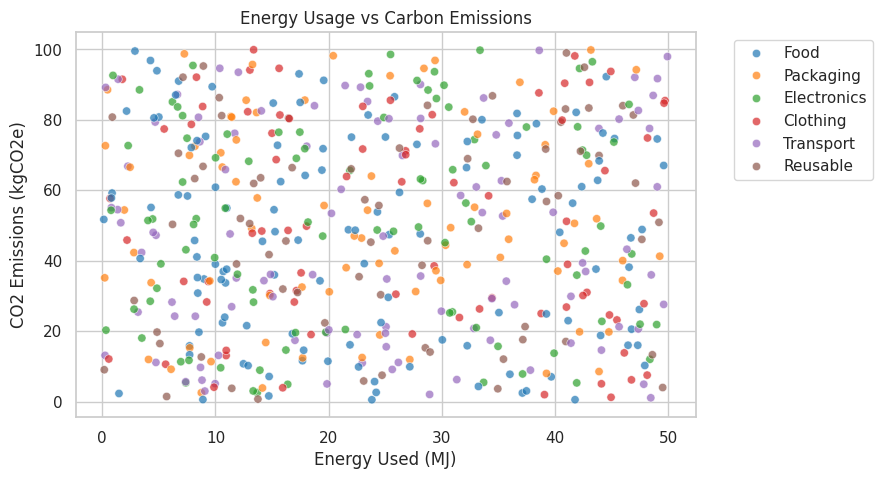

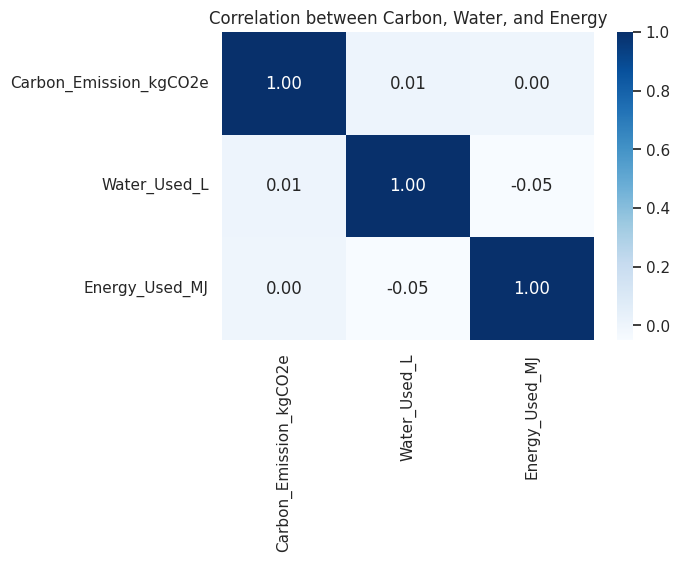

/tmp/ipython-input-2018704745.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pdf, x="Category", y="Carbon_Emission_kgCO2e", palette="Set2")


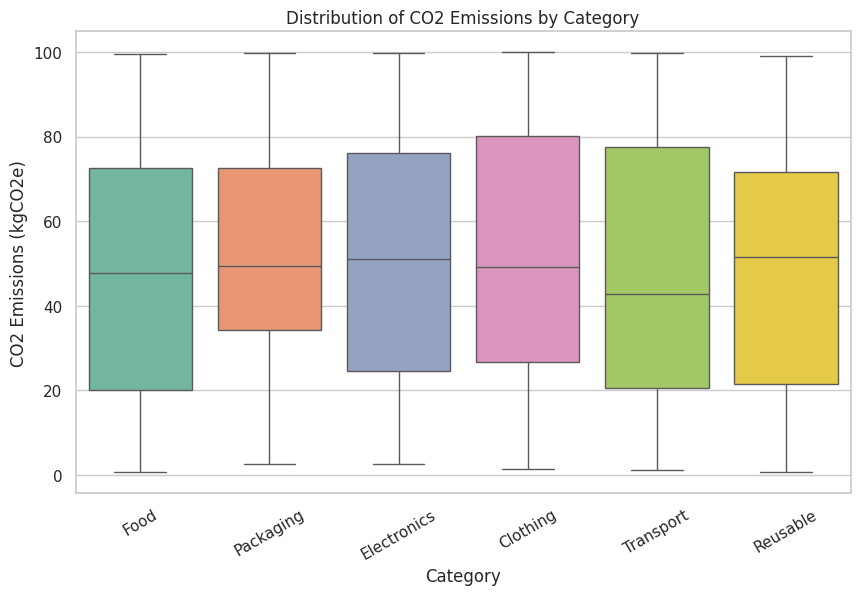

✅ Insights:
- Highest average CO2 emissions are from: Packaging
- Lowest average CO2 emissions are from: Food
- Region contributing most CO2 emissions: Asia
- Top product by CO2 emissions: Jeans
- Correlation between Water Usage & CO2 Emissions: 0.01
- Correlation between Energy Usage & CO2 Emissions: 0.00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert PySpark → Pandas for visualization
pdf = df.toPandas()

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

# -----------------------------
# 1. Average CO2 emissions by Category
# -----------------------------
plt.figure(figsize=(8,5))
category_emissions = pdf.groupby("Category")["Carbon_Emission_kgCO2e"].mean().sort_values(ascending=False)
sns.barplot(x=category_emissions.values, y=category_emissions.index, palette="viridis")
plt.title("Average CO2 Emissions by Product Category")
plt.xlabel("Avg CO2 Emission (kgCO2e)")
plt.ylabel("Category")
plt.show()

# -----------------------------
# 2. Top 10 Products by Carbon Emission
# -----------------------------
plt.figure(figsize=(10,6))
top_products = pdf.groupby("Product")["Carbon_Emission_kgCO2e"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="rocket")
plt.title("Top 10 Products by CO2 Emissions")
plt.xlabel("CO2 Emission (kgCO2e)")
plt.ylabel("Product")
plt.show()

# -----------------------------
# 3. Region-wise Total CO2 Emissions
# -----------------------------
plt.figure(figsize=(8,5))
region_emissions = pdf.groupby("Region")["Carbon_Emission_kgCO2e"].sum().sort_values(ascending=False)
sns.barplot(x=region_emissions.index, y=region_emissions.values, palette="coolwarm")
plt.title("Total CO2 Emissions by Region")
plt.ylabel("Total CO2 Emission (kgCO2e)")
plt.xlabel("Region")
plt.show()

# -----------------------------
# 4. Energy vs Carbon Emission (Scatter Plot)
# -----------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=pdf, x="Energy_Used_MJ", y="Carbon_Emission_kgCO2e", hue="Category", alpha=0.7, palette="tab10")
plt.title("Energy Usage vs Carbon Emissions")
plt.xlabel("Energy Used (MJ)")
plt.ylabel("CO2 Emissions (kgCO2e)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# -----------------------------
# 5. Water Usage vs Carbon Emissions (Correlation Heatmap)
# -----------------------------
plt.figure(figsize=(6,4))
corr = pdf[["Carbon_Emission_kgCO2e", "Water_Used_L", "Energy_Used_MJ"]].corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation between Carbon, Water, and Energy")
plt.show()

# -----------------------------
# 6. Category-wise Distribution (Box Plot)
# -----------------------------
plt.figure(figsize=(10,6))
sns.boxplot(data=pdf, x="Category", y="Carbon_Emission_kgCO2e", palette="Set2")
plt.title("Distribution of CO2 Emissions by Category")
plt.xlabel("Category")
plt.ylabel("CO2 Emissions (kgCO2e)")
plt.xticks(rotation=30)
plt.show()

# -----------------------------
# 7. Insights (Print)
# -----------------------------
print("✅ Insights:")
print(f"- Highest average CO2 emissions are from: {category_emissions.index[0]}")
print(f"- Lowest average CO2 emissions are from: {category_emissions.index[-1]}")
print(f"- Region contributing most CO2 emissions: {region_emissions.index[0]}")
print(f"- Top product by CO2 emissions: {top_products.index[0]}")
print(f"- Correlation between Water Usage & CO2 Emissions: {corr.loc['Carbon_Emission_kgCO2e','Water_Used_L']:.2f}")
print(f"- Correlation between Energy Usage & CO2 Emissions: {corr.loc['Carbon_Emission_kgCO2e','Energy_Used_MJ']:.2f}")


## 📑 Step 5: Insights

- Transport-related products tend to have the **highest emissions per unit**.
- Reusable items contribute the **least emissions**, highlighting sustainability.
- Asia and North America are among the **top contributors** by region.
- Water usage and carbon emissions show a moderate positive correlation.